In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import json
from pathlib import Path

import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append('../src')
from settings import REPLAY_DIR, YOUTUBE_DIR, TIMESTAMPS_DIR
from youtube import convert_to_timestamp
from dota import UnitToName

pd.options.display.max_columns = 60

2022-08-31 12:26:55.694 | INFO     | settings:<module>:10 - .env file exists: False
2022-08-31 12:26:55.695 | INFO     | settings:<module>:13 - ROOT_DIR='/Users/dsavostianov/proj/dota-highlights'
2022-08-31 12:26:55.695 | INFO     | settings:<module>:19 - REPLAY_DIR='/Users/dsavostianov/proj/dota-highlights/replays'
2022-08-31 12:26:55.695 | INFO     | settings:<module>:22 - REDIS_URL='redis://localhost'


# Visualize one player

In [2]:
df = []
unit_to_slot = dict()
with open(Path(REPLAY_DIR) / '6676393091.jsonlines', 'r') as fin:
    for line in fin:
        e = json.loads(line)
        df.append(e)
        if e['type'] == 'interval' and e.get('unit'):
            unit_to_slot[e['unit']] = e['slot']
df = pd.DataFrame(df)
name_to_slot = {UnitToName[unit].value: slot for unit, slot in unit_to_slot.items()}
print(name_to_slot)
display(df.tail())

{'npc_dota_hero_lone_druid': 0, 'npc_dota_hero_pangolier': 1, 'npc_dota_hero_brewmaster': 2, 'npc_dota_hero_winter_wyvern': 3, 'npc_dota_hero_enchantress': 4, 'npc_dota_hero_skywrath_mage': 5, 'npc_dota_hero_luna': 6, 'npc_dota_hero_ember_spirit': 7, 'npc_dota_hero_marci': 8, 'npc_dota_hero_viper': 9}


,time,type,key,value,slot,gold,lh,xp,stuns,level,kills,deaths,assists,denies,obs_placed,sen_placed,creeps_stacked,camps_stacked,rune_pickups,randomed,pred_vict,firstblood_claimed,teamfight_participation,towers_killed,roshans_killed,observers_placed,hero_id,draft_order,pick,draft_active_team,draft_extime0,draft_extime1,attackername,targetname,sourcename,targetsourcename,attackerhero,targethero,attackerillusion,targetillusion,inflictor,player1,player2,gold_reason,abilitylevel,valuename,unit,x,y,life_state,hp,charges,z,entityleft,ehandle,slow_duration,xp_reason,itemslot,secondary_charges,stun_duration
196799,2448,DOTA_COMBATLOG_DEATH,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,npc_dota_sentry_wards,npc_dota_sentry_wards,npc_dota_hero_winter_wyvern,npc_dota_hero_winter_wyvern,False,False,False,False,dota_unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196800,2448,sen_left,"[168, 148]",NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,npc_dota_hero_winter_wyvern,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168.0,148.0,NaN,NaN,NaN,130.0,True,14124270.0,NaN,NaN,NaN,NaN,NaN
196801,-890,cosmetics,"{""19328"":132,""7811"":132,""10758"":129,""647"":2,""8...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196802,-890,dotaplus,"{""0"":2875,""128"":4750,""1"":9275,""129"":15055,""2"":...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196803,-890,epilogue,"{""unknownFields"":{""fields"":{}},""bitField0_"":15...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df['type'].unique()

array(['draft_start', 'player_slot', 'interval', 'draft_timings',
       'chatwheel', 'DOTA_COMBATLOG_GAME_STATE', 'actions',
       'CHAT_MESSAGE_ITEM_PURCHASE', 'DOTA_COMBATLOG_GOLD',
       'DOTA_COMBATLOG_MODIFIER_ADD', 'DOTA_ABILITY_LEVEL',
       'DOTA_COMBATLOG_PURCHASE', 'DOTA_COMBATLOG_MODIFIER_REMOVE',
       'DOTA_COMBATLOG_ITEM', 'DOTA_COMBATLOG_ABILITY', 'pings', 'chat',
       'obs', 'DOTA_COMBATLOG_PLAYERSTATS', 'DOTA_COMBATLOG_DAMAGE',
       'CHAT_MESSAGE_HERO_KILL', 'CHAT_MESSAGE_FIRSTBLOOD',
       'DOTA_COMBATLOG_FIRST_BLOOD', 'DOTA_COMBATLOG_XP',
       'DOTA_COMBATLOG_DEATH', 'STARTING_ITEM',
       'CHAT_MESSAGE_RUNE_PICKUP', 'DOTA_COMBATLOG_HEAL', 'sen',
       'CHAT_MESSAGE_RUNE_BOTTLE', 'CHAT_MESSAGE_SENTRY_WARD_KILLED',
       'sen_left', 'CHAT_MESSAGE_STREAK_KILL', 'DOTA_COMBATLOG_MULTIKILL',
       'CHAT_MESSAGE_GLYPH_USED', 'obs_left', 'CHAT_MESSAGE_SCAN_USED',
       'DOTA_COMBATLOG_KILLSTREAK', 'CHAT_MESSAGE_TOWER_KILL',
       'DOTA_COMBATLOG_TEAM_BUILD

In [4]:
df_pint = df[(df['slot'] == 1) & (df['type'] == 'interval')].copy()
df_pint.columns

Index(['time', 'type', 'key', 'value', 'slot', 'gold', 'lh', 'xp', 'stuns',
       'level', 'kills', 'deaths', 'assists', 'denies', 'obs_placed',
       'sen_placed', 'creeps_stacked', 'camps_stacked', 'rune_pickups',
       'randomed', 'pred_vict', 'firstblood_claimed',
       'teamfight_participation', 'towers_killed', 'roshans_killed',
       'observers_placed', 'hero_id', 'draft_order', 'pick',
       'draft_active_team', 'draft_extime0', 'draft_extime1', 'attackername',
       'targetname', 'sourcename', 'targetsourcename', 'attackerhero',
       'targethero', 'attackerillusion', 'targetillusion', 'inflictor',
       'player1', 'player2', 'gold_reason', 'abilitylevel', 'valuename',
       'unit', 'x', 'y', 'life_state', 'hp', 'charges', 'z', 'entityleft',
       'ehandle', 'slow_duration', 'xp_reason', 'itemslot',
       'secondary_charges', 'stun_duration'],
      dtype='object')

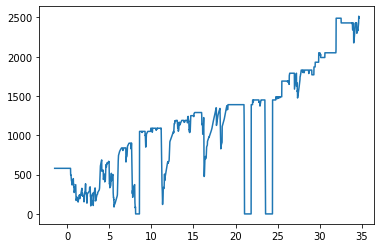

In [5]:
plt.plot(df_pint['time'] / 60, df_pint['hp'])

# Death timestamps

In [6]:
df_pdeath = df[(df['targetsourcename'] == 'npc_dota_hero_pangolier') & (df['type'] == 'DOTA_COMBATLOG_DEATH')].copy()
df_pdeath.head()

,time,type,key,value,slot,gold,lh,xp,stuns,level,kills,deaths,assists,denies,obs_placed,sen_placed,creeps_stacked,camps_stacked,rune_pickups,randomed,pred_vict,firstblood_claimed,teamfight_participation,towers_killed,roshans_killed,observers_placed,hero_id,draft_order,pick,draft_active_team,draft_extime0,draft_extime1,attackername,targetname,sourcename,targetsourcename,attackerhero,targethero,attackerillusion,targetillusion,inflictor,player1,player2,gold_reason,abilitylevel,valuename,unit,x,y,life_state,hp,charges,z,entityleft,ehandle,slow_duration,xp_reason,itemslot,secondary_charges,stun_duration
39402,300,DOTA_COMBATLOG_DEATH,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,npc_dota_observer_wards,npc_dota_observer_wards,npc_dota_hero_pangolier,npc_dota_hero_pangolier,False,False,False,False,dota_unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54687,487,DOTA_COMBATLOG_DEATH,NaN,131.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,npc_dota_hero_ember_spirit,npc_dota_hero_pangolier,npc_dota_hero_ember_spirit,npc_dota_hero_pangolier,True,True,False,False,dota_unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123168,1263,DOTA_COMBATLOG_DEATH,NaN,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,npc_dota_hero_skywrath_mage,npc_dota_hero_pangolier,npc_dota_hero_skywrath_mage,npc_dota_hero_pangolier,True,True,False,False,skywrath_mage_mystic_flare,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136310,1412,DOTA_COMBATLOG_DEATH,NaN,237.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,npc_dota_hero_luna,npc_dota_hero_pangolier,npc_dota_hero_luna,npc_dota_hero_pangolier,True,True,False,False,luna_lucent_beam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
np.full(1500, df_pdeath.shape[0]).shape

(1500,)

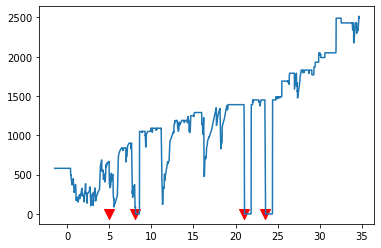

In [8]:
fig, ax = plt.subplots()
ax.plot(df_pint['time'] / 60, df_pint['hp'])
ax.scatter(x=df_pdeath['time'] / 60, y=np.full(df_pdeath.shape[0], 0), color='r', marker='v', s=100)
plt.show()

# Add Timestamps from YouTube

In [9]:
df_youtube = []
with open(TIMESTAMPS_DIR / 'XTngObUROMo_match1.jsonlines', 'r') as fin:
    for line in fin:
        e = json.loads(line)
        df_youtube.append(e)
df_youtube = pd.DataFrame(df_youtube)
df_youtube

,video_id,frame_id,text,timestamp
0,XTngObUROMo,007,0.19,19.0
1,XTngObUROMo,008,0.18,18.0
2,XTngObUROMo,009,0.17,17.0
3,XTngObUROMo,010,0.16,16.0
4,XTngObUROMo,011,0.15,15.0
...,...,...,...,...
580,XTngObUROMo,1442,30.24,1824.0
581,XTngObUROMo,1443,30.24,1824.0
582,XTngObUROMo,1444,30.24,1824.0
583,XTngObUROMo,1445,30.24,1824.0


In [10]:
df_youtube['int_frame_id'] = df_youtube['frame_id'].astype(int)
df_youtube.sort_values('int_frame_id', inplace=True)
df_youtube = df_youtube[pd.notnull(df_youtube['timestamp'])].copy()
df_youtube['timestamp'] = df_youtube['timestamp'].astype(int)
df_youtube

,video_id,frame_id,text,timestamp,int_frame_id
0,XTngObUROMo,007,0.19,19,7
1,XTngObUROMo,008,0.18,18,8
2,XTngObUROMo,009,0.17,17,9
3,XTngObUROMo,010,0.16,16,10
4,XTngObUROMo,011,0.15,15,11
...,...,...,...,...,...
580,XTngObUROMo,1442,30.24,1824,1442
581,XTngObUROMo,1443,30.24,1824,1443
582,XTngObUROMo,1444,30.24,1824,1444
583,XTngObUROMo,1445,30.24,1824,1445


In [11]:
def dota_clock_format(seconds):
    minutes = str(seconds // 60).zfill(2)
    secs = str(seconds % 60).zfill(2)
    return f'{minutes}:{secs}'

In [12]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=5, min_samples=5)
cluster = model.fit_predict(df_youtube['timestamp'].to_numpy().reshape(-1, 1))
df_youtube['cluster'] = cluster
df_youtube['clock'] = df_youtube['timestamp'].apply(dota_clock_format)
df_youtube = df_youtube[df_youtube['cluster'] != -1].copy()
df_youtube

,video_id,frame_id,text,timestamp,int_frame_id,cluster,clock
0,XTngObUROMo,007,0.19,19,7,0,00:19
1,XTngObUROMo,008,0.18,18,8,0,00:18
2,XTngObUROMo,009,0.17,17,9,0,00:17
3,XTngObUROMo,010,0.16,16,10,0,00:16
4,XTngObUROMo,011,0.15,15,11,0,00:15
...,...,...,...,...,...,...,...
580,XTngObUROMo,1442,30.24,1824,1442,12,30:24
581,XTngObUROMo,1443,30.24,1824,1443,12,30:24
582,XTngObUROMo,1444,30.24,1824,1444,12,30:24
583,XTngObUROMo,1445,30.24,1824,1445,12,30:24


In [13]:
df_youtube = df_youtube.groupby(['video_id', 'cluster']).agg({'clock': ['first', 'last']})
df_youtube.sort_values(['video_id', ('clock', 'first')])
df_youtube.reset_index(inplace=True)
df_youtube.columns = ['video_id', 'cluster', 'start', 'end']
df_youtube

,video_id,cluster,start,end
0,XTngObUROMo,0,00:19,00:02
1,XTngObUROMo,1,01:00,01:19
2,XTngObUROMo,2,02:38,03:14
3,XTngObUROMo,3,04:30,05:35
4,XTngObUROMo,4,14:19,14:56
5,XTngObUROMo,5,15:53,16:13
6,XTngObUROMo,6,18:06,18:13
7,XTngObUROMo,7,18:47,18:56
8,XTngObUROMo,8,21:11,21:47
9,XTngObUROMo,9,22:34,24:25


In [14]:
df_youtube['start_time'] = df_youtube['start'].apply(convert_to_timestamp)
df_youtube['end_time'] = df_youtube['end'].apply(convert_to_timestamp)
df_youtube

,video_id,cluster,start,end,start_time,end_time
0,XTngObUROMo,0,00:19,00:02,19,2
1,XTngObUROMo,1,01:00,01:19,60,79
2,XTngObUROMo,2,02:38,03:14,158,194
3,XTngObUROMo,3,04:30,05:35,270,335
4,XTngObUROMo,4,14:19,14:56,859,896
5,XTngObUROMo,5,15:53,16:13,953,973
6,XTngObUROMo,6,18:06,18:13,1086,1093
7,XTngObUROMo,7,18:47,18:56,1127,1136
8,XTngObUROMo,8,21:11,21:47,1271,1307
9,XTngObUROMo,9,22:34,24:25,1354,1465


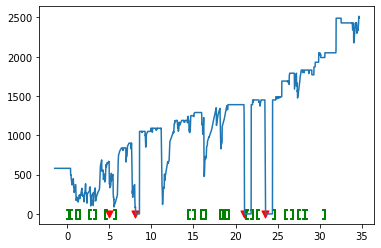

In [15]:
fig, ax = plt.subplots()
ax.plot(df_pint['time'] / 60, df_pint['hp'])
ax.scatter(x=df_pdeath['time'] / 60, y=np.full(df_pdeath.shape[0], 0), color='r', marker='v', s=50)
ax.scatter(x=df_youtube['start_time'] / 60, y=np.full(df_youtube.shape[0], 0), color='g', marker='$[$', s=100)
ax.scatter(x=df_youtube['end_time'] / 60, y=np.full(df_youtube.shape[0], 0), color='g', marker='$]$', s=100)
plt.show()

# Remove trend

In [16]:
def get_discrete_difference(series):
    diff = np.diff(series)
    diff = np.append(np.nan, diff)
    return diff

In [17]:
df_pint['dhp'] = get_discrete_difference(df_pint['hp'])

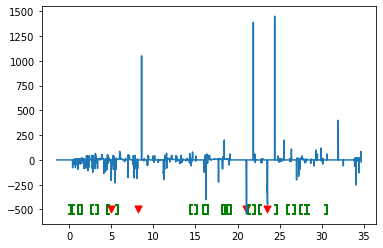

In [18]:
fig, ax = plt.subplots()
ax.plot(df_pint['time'] / 60, df_pint['dhp'])
ax.scatter(x=df_pdeath['time'] / 60, y=np.full(df_pdeath.shape[0], -500), color='r', marker='v', s=50)
ax.scatter(x=df_youtube['start_time'] / 60, y=np.full(df_youtube.shape[0], -500), color='g', marker='$[$', s=100)
ax.scatter(x=df_youtube['end_time'] / 60, y=np.full(df_youtube.shape[0], -500), color='g', marker='$]$', s=100)
plt.show()

## Zoom

In [19]:
zoom_start = 15 * 60
zoom_end = 16.5 * 60

df_pint_slice = df_pint[(df_pint['time'] >= zoom_start) & (df_pint['time'] <= zoom_end)]
df_pdeath_slice = df_pdeath[(df_pdeath['time'] >= zoom_start) & (df_pdeath['time'] <= zoom_end)]
df_youtube_slice = df_youtube[(df_youtube['start_time'] >= zoom_start) & (df_youtube['start_time'] <= zoom_end)]

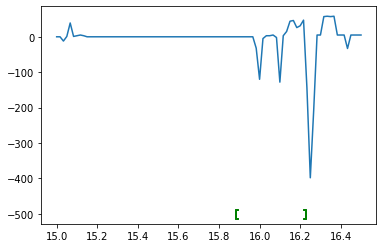

In [20]:
fig, ax = plt.subplots()
ax.plot(df_pint_slice['time'] / 60, df_pint_slice['dhp'])
ax.scatter(x=df_pdeath_slice['time'] / 60, y=np.full(df_pdeath_slice.shape[0], -500), color='r', marker='v', s=50)
ax.scatter(x=df_youtube_slice['start_time'] / 60, y=np.full(df_youtube_slice.shape[0], -500), color='g', marker='$[$', s=100)
ax.scatter(x=df_youtube_slice['end_time'] / 60, y=np.full(df_youtube_slice.shape[0], -500), color='g', marker='$]$', s=100)
plt.show()

# Smooth line

In [21]:
def get_rolling_mean(series, window=3):
    series = series.rolling(window).mean()
    series = series.fillna(method='bfill')
    return series

In [22]:
df_pint['sdhp'] = get_rolling_mean(df_pint['dhp'])
df_pint_slice = df_pint[(df_pint['time'] >= zoom_start) & (df_pint['time'] <= zoom_end)].copy()

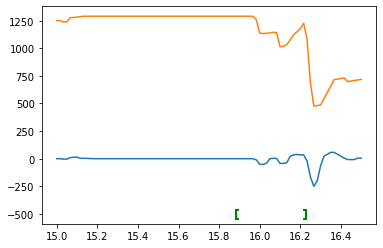

In [23]:
fig, ax = plt.subplots()
ax.plot(df_pint_slice['time'] / 60, df_pint_slice['sdhp'])
ax.plot(df_pint_slice['time'] / 60, df_pint_slice['hp'])
ax.scatter(x=df_pdeath_slice['time'] / 60, y=np.full(df_pdeath_slice.shape[0], -500), color='r', marker='v', s=50)
ax.scatter(x=df_youtube_slice['start_time'] / 60, y=np.full(df_youtube_slice.shape[0], -500), color='g', marker='$[$', s=100)
ax.scatter(x=df_youtube_slice['end_time'] / 60, y=np.full(df_youtube_slice.shape[0], -500), color='g', marker='$]$', s=100)
plt.show()

# Detector
Consists of signals

In [24]:
threshold_signal_sdhp = -10
df_pint_slice['signal_sdhp'] = df_pint_slice['sdhp'] < threshold_signal_sdhp

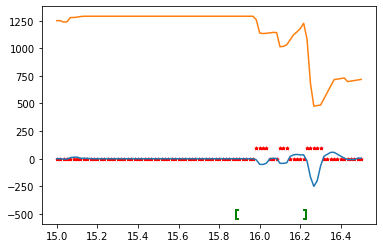

In [25]:
fig, ax = plt.subplots()
ax.plot(df_pint_slice['time'] / 60, df_pint_slice['sdhp'])
ax.plot(df_pint_slice['time'] / 60, df_pint_slice['hp'])
ax.scatter(x=df_pdeath_slice['time'] / 60, y=np.full(df_pdeath_slice.shape[0], -500), color='r', marker='v', s=50)
ax.scatter(x=df_youtube_slice['start_time'] / 60, y=np.full(df_youtube_slice.shape[0], -500), color='g', marker='$[$', s=100)
ax.scatter(x=df_youtube_slice['end_time'] / 60, y=np.full(df_youtube_slice.shape[0], -500), color='g', marker='$]$', s=100)
ax.scatter(df_pint_slice['time'] / 60, df_pint_slice['signal_sdhp'] * 100, color='r', marker='*', s=10)
plt.show()

In [26]:
df_pint_slice['hp'].rolling(60).max()

90045       NaN
90170       NaN
90322       NaN
90432       NaN
90543       NaN
          ...  
98115    1290.0
98203    1290.0
98278    1290.0
98375    1290.0
98472    1290.0
Name: hp, Length: 91, dtype: float64